In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_histogram

In [2]:
def reflection_operator(n):
    qc1 = QuantumCircuit(n)
    qc1.x(range(n))
    qc1.h(0)
    qc1.append(MCXGate(n-1), list(range(1, n))+[0])
    qc1.h(0)
    qc1.x(range(n))
    return qc1.to_gate()

def grover_gate(n, oracle_gate):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.append(oracle_gate, range(n))
    qc.h(range(n))
    qc.append(reflection_operator(n), range(n))
    qc.h(range(n))
    return qc.to_gate()

In [3]:
n = 4
N = 2**n
oracle_vals = np.array([1.]*N)
oracle_vals[10] = -1.
oracle_gate = UnitaryGate(np.diag(oracle_vals))

In [4]:
qc = QuantumCircuit(n, n)
qc.append(grover_gate(n, oracle_gate), range(n))
qc.measure(range(n), range(n))

In [5]:
backend = Aer.get_backend('aer_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()


In [6]:
result.get_counts()

{'0101': 32,
 '0110': 36,
 '0111': 35,
 '1100': 33,
 '0100': 31,
 '0011': 37,
 '0001': 31,
 '1010': 467,
 '1110': 43,
 '1000': 42,
 '1111': 34,
 '1101': 38,
 '0000': 36,
 '0010': 33,
 '1011': 33,
 '1001': 39}

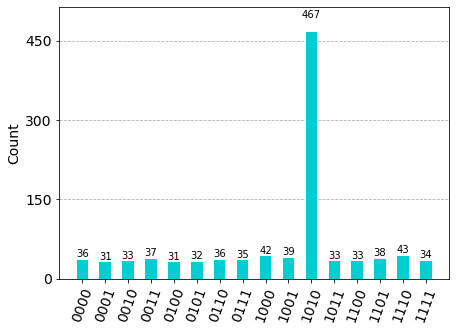

In [7]:
plot_histogram(result.get_counts(), color='darkturquoise')

In [8]:
qc.draw()

┌─────────────┐┌─┐         
q_0: ┤0            ├┤M├─────────
     │             │└╥┘┌─┐      
q_1: ┤1            ├─╫─┤M├──────
     │  circuit-88 │ ║ └╥┘┌─┐   
q_2: ┤2            ├─╫──╫─┤M├───
     │             │ ║  ║ └╥┘┌─┐
q_3: ┤3            ├─╫──╫──╫─┤M├
     └─────────────┘ ║  ║  ║ └╥┘
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3

In [9]:
qc.decompose().draw()

┌───┐┌──────────┐┌───┐┌─────────────┐┌───┐┌─┐         
q_0: ┤ H ├┤0         ├┤ H ├┤0            ├┤ H ├┤M├─────────
     ├───┤│          │├───┤│             │├───┤└╥┘┌─┐      
q_1: ┤ H ├┤1         ├┤ H ├┤1            ├┤ H ├─╫─┤M├──────
     ├───┤│  Unitary │├───┤│  circuit-89 │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2         ├┤ H ├┤2            ├┤ H ├─╫──╫─┤M├───
     ├───┤│          │├───┤│             │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3         ├┤ H ├┤3            ├┤ H ├─╫──╫──╫─┤M├
     └───┘└──────────┘└───┘└─────────────┘└───┘ ║  ║  ║ └╥┘
c: 4/═══════════════════════════════════════════╩══╩══╩══╩═
                                                0  1  2  3

In [10]:
qc.qasm()

TypeError: can only concatenate str (not "NoneType") to str